<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 종합실습 - 판매 현황 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

# 1.환경 설정

**1)라이브러리 불러오기**

- 사용할 라이브러리를 불러오세오.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**2) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [2]:
# 한글 폰트설정 #1
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 한글 폰트설정 #2: 구글 코랩 포함
#!pip install koreanize_matplotlib
#import koreanize_matplotlib

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 각각의 데이터프레임을 만듭니다.
- 데이터프레임 이름은 customers, sales로 합니다.
- 파일 경로
    - 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
    - 'https://raw.githubusercontent.com/Jangrae/csv/master/sales.csv'

In [106]:
# customers 데이터 읽어오기
customers = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv')
customers.head()



,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [107]:
# sales 데이터 읽어오기
sales = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/sales.csv')
sales.head()


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


# 2.데이터 전처리 #1

**1) 고객별 집계**

- sales 데이터프레임에서 고객(CustomerID)별 주문 수량(Qty) 합, 금액(Amt) 합을 집계하여 cust_sales 데이터프레임을 선언합니다.

In [108]:
# 고객별 집계
cust_sales = sales.groupby(by='CustomerID', as_index=False)[['Qty', 'Amt']].sum()
cust_sales

,CustomerID,Qty,Amt
0,c017487,127,296447
1,c017503,42,160444
2,c017517,192,317590
3,c017522,64,219849
4,c017526,26,48881
...,...,...,...
2232,c400937,1,1650
2233,c401555,3,11940
2234,c401584,2,6509
2235,c402010,5,20650


**2) 데이터 병합**

- customers, cust_sales 데이터프레임을 **CustomerID** 열을 기준으로 **outer** 방식으로 **병합(=조인)** 하여 **cst** 데이터프레임으로 선언합니다.

- **이제부터 모든 작업은 cst 데이터프레임을 대상으로 합니다.**

In [109]:
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [110]:
# 병합
cst = pd.merge(customers, cust_sales, on='CustomerID',how='outer' ) # 이너조인도 동일
cst.head()


,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구,42.0,160444.0
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,192.0,317590.0
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시,64.0,219849.0
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시,26.0,48881.0


**3) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [111]:
# 결측치 확인
cst.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
Qty             6
Amt             6
dtype: int64

**4) 결측치 제거**

- 결측치가 있는 행은 제거합니다.

In [112]:
# 결측치 제거
cst.dropna(inplace=True)
cst.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
Qty             0
Amt             0
dtype: int64

**5) 열 추가: RegisterYear, RegisterMonth**

- 다음 구문을 실행해서 RegisterYear, RegisterMonth 열을 추가합니다.

In [113]:
cst.head(1)

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0


In [114]:
# RegisterYear, RegisterMonth 열 추가
cst['RegisterDate'] = pd.to_datetime(cst['RegisterDate'])
cst['RegisterYear'] = cst['RegisterDate'].dt.year
cst['RegisterMonth'] = cst['RegisterDate'].dt.month

# 확인
cst.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0,2002,7
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구,42.0,160444.0,2002,7
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,192.0,317590.0,2002,7
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시,64.0,219849.0,2002,7
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시,26.0,48881.0,2002,7


**6) 열 추가: Age**

- 'Age = 2017 - 출생연도(BirthYear)'  공식을 이용해 Age 열을 추가합니다.

In [115]:
# Age 추가
cst['Age'] = 2017-cst['BirthYear']
cst.head(3)

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0,2002,7,49
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구,42.0,160444.0,2002,7,46
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,192.0,317590.0,2002,7,50


**7) 열 추가: Age2**

- 'Age2 = Age // 10 * 10' 공식을 이용해 Age2 열을 추가합니다.

In [116]:
# Age2 추가
cst['Age2'] = cst['Age'] //10*10
cst.head(3)

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0,2002,7,49,40
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구,42.0,160444.0,2002,7,46,40
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,192.0,317590.0,2002,7,50,50


**8) 열 추가: Level**

- 다음 Amt 열의 값 기준에 따라 등급을 갖는 Level 열을 추가합니다.
    * ~ 30,000: Family
    * ~ 100,000: Bronze
    * ~ 300,000: Silver
    * ~ 600,000: Gold
    * 600,000 ~ : Platinum

In [117]:
cst['Amt'].describe()

count    2.237000e+03
mean     8.761226e+04
std      1.401784e+05
min      2.730000e+02
25%      8.450000e+03
50%      3.015000e+04
75%      1.026730e+05
max      1.245250e+06
Name: Amt, dtype: float64

In [118]:
import numpy as np

# Level 열 추가
bin = [-np.inf, 30000, 100000, 300000, 600000, np.inf]
label = ['Family','Bronze', 'Silver', 'Gold', 'Platinum']

cst['Level'] = pd.cut(cst['Amt'], bins=bin, labels=label)
cst.head(3)


,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시,127.0,296447.0,2002,7,49,40,Silver
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구,42.0,160444.0,2002,7,46,40,Silver
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시,192.0,317590.0,2002,7,50,50,Gold


**9) 불필요한 열 제거**

- RegisterDate, Address, BirthYear, Addr2 열을 제거합니다.

In [119]:
# 불필요한 열 제거
cst.drop(['RegisterDate', 'Address', 'BirthYear', 'Addr2' ], axis=1, inplace=True)
cst.head(3)

,CustomerID,Gender,Addr1,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,F,경기도,127.0,296447.0,2002,7,49,40,Silver
1,c017503,F,서울특별시,42.0,160444.0,2002,7,46,40,Silver
2,c017517,M,경기도,192.0,317590.0,2002,7,50,50,Gold


# 3.데이터 집계

**1) 지역별 고객 수**

- 지역(Addr1)별 고객(CustomerID) 수를 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '지역', '고객수'로 변경합니다.
- tmp 데이터프레임을 고객수를 기준으로 내림차순 정렬합니다.
- tmp 데이터프레임의 상위 5개 행만을 추출해 tmp_5 데이터프레임으로 선언합니다.

In [120]:
# 지역별 고객 수
tmp = cst.groupby(by='Addr1', as_index=False)['CustomerID'].count()
tmp

,Addr1,CustomerID
0,강원도,62
1,경기도,1257
2,경상남도,1
3,경상북도,2
4,광주광역시,3
5,대구광역시,8
6,서울특별시,561
7,인천광역시,325
8,전라남도,3
9,전라북도,1


In [121]:
col_names = ['지역', '고객수']
tmp.columns = col_names
tmp.head()

,지역,고객수
0,강원도,62
1,경기도,1257
2,경상남도,1
3,경상북도,2
4,광주광역시,3


In [122]:
tmp.sort_values(by='고객수', ascending=False, inplace=True)
tmp_5 = tmp.head()
tmp_5

,지역,고객수
1,경기도,1257
6,서울특별시,561
7,인천광역시,325
0,강원도,62
5,대구광역시,8


- tmp_5 데이터프레임을 막대 그래프로 시각화 합니다.

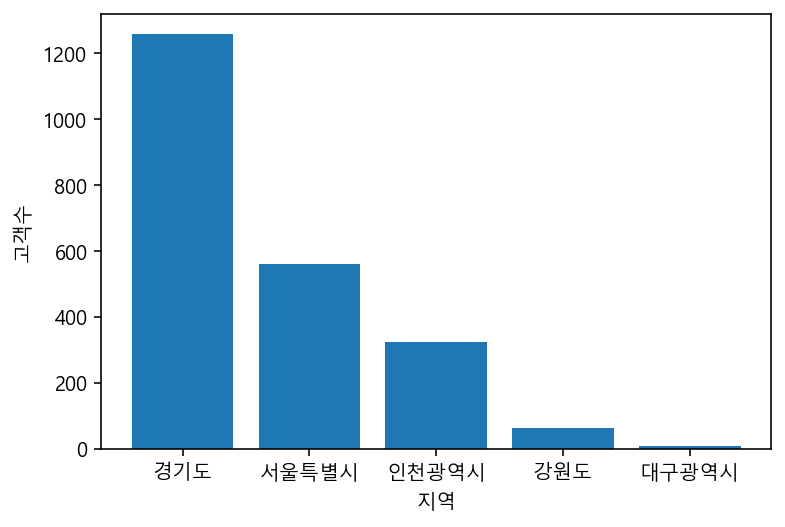

In [153]:
# 지역별 고객 수 TOP 5 시각화
plt.bar(tmp_5['지역'], tmp_5['고객수'])
plt.xlabel('지역')
plt.ylabel('고객수')
plt.show()


**2) 연령대별 고객 수**

- 연령대(Age2)별 고객 수를 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '연령대', '고객수'로 변경합니다.
- tmp 데이터프레임 연령대 열의 데이터 형식을 문자열로 변환합니다.

In [124]:
cst.head(3)

,CustomerID,Gender,Addr1,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,F,경기도,127.0,296447.0,2002,7,49,40,Silver
1,c017503,F,서울특별시,42.0,160444.0,2002,7,46,40,Silver
2,c017517,M,경기도,192.0,317590.0,2002,7,50,50,Gold


In [125]:
# 연령대별 고객 수
tmp = cst.groupby(by='Age2', as_index=False)[['CustomerID']].count()
tmp

,Age2,CustomerID
0,10,1
1,20,33
2,30,563
3,40,1008
4,50,412
5,60,162
6,70,53
7,80,5


In [126]:
col_names = ['연령대', '고객수']
tmp.columns = col_names
tmp.head()

,연령대,고객수
0,10,1
1,20,33
2,30,563
3,40,1008
4,50,412


In [127]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연령대     8 non-null      int64
 1   고객수     8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [128]:
tmp['연령대']=tmp['연령대'].astype(str)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령대     8 non-null      object
 1   고객수     8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


- tmp 데이터프레임을 막대 그래프로 시각화 합니다.

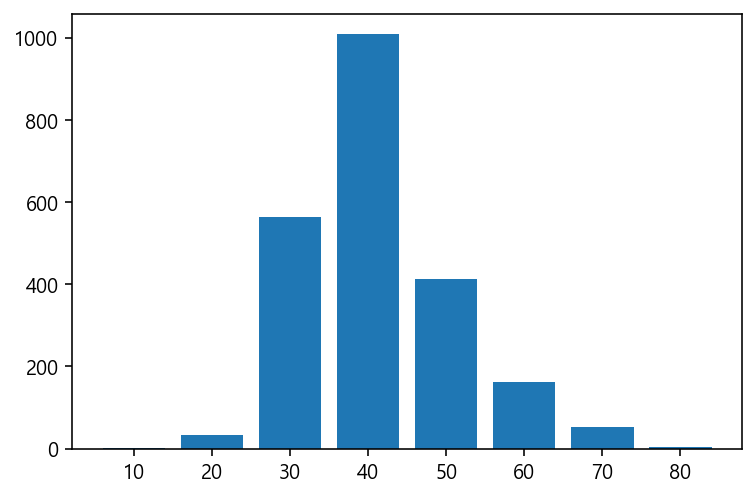

In [129]:
# 연령대별 고객 수 시각화
plt.bar(tmp['연령대'], tmp['고객수'])
plt.show()

**3) 등급별 판매 금액**

- 등급(Level)별 판매 금액(Amt)을 집계하여 tmp 데이터프레임으로 선언합니다.
- tmp 데이터프레임 열 이름을 '등급', '합계금액'으로 변경합니다.
- 합계금액은 10,000 단위로 변경합니다.

In [130]:
cst.head()

,CustomerID,Gender,Addr1,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,F,경기도,127.0,296447.0,2002,7,49,40,Silver
1,c017503,F,서울특별시,42.0,160444.0,2002,7,46,40,Silver
2,c017517,M,경기도,192.0,317590.0,2002,7,50,50,Gold
3,c017522,F,강원도,64.0,219849.0,2002,7,52,50,Silver
4,c017526,F,경기도,26.0,48881.0,2002,7,57,50,Bronze


In [131]:
# 등급별 판매 금액
tmp = cst.groupby(by='Level', as_index=False)[['Amt']].sum()
tmp

,Level,Amt
0,Family,11673452.0
1,Bronze,31937917.0
2,Silver,68939554.0
3,Gold,57571275.0
4,Platinum,25866427.0


In [132]:
col_names = ['등급', '합계금액']
tmp.columns = col_names
tmp.head()

,등급,합계금액
0,Family,11673452.0
1,Bronze,31937917.0
2,Silver,68939554.0
3,Gold,57571275.0
4,Platinum,25866427.0


In [133]:
tmp['합계금액']

0    11673452.0
1    31937917.0
2    68939554.0
3    57571275.0
4    25866427.0
Name: 합계금액, dtype: float64

In [134]:
# tmp['합계금액'] = tmp['합계금액'].apply(lambda x : int(x/10000))
# tmp['합계금액'] = list(map(lambda x: int(round(x / 10000, 0)), tmp['합계금액']))

tmp['합계금액'] = tmp['합계금액'] / 10000
tmp['합계금액'] = tmp['합계금액'].astype(int)
tmp['합계금액']

0    1167
1    3193
2    6893
3    5757
4    2586
Name: 합계금액, dtype: int64

- tmp 데이터프레임을 막대 그래프로 시각화 합니다.

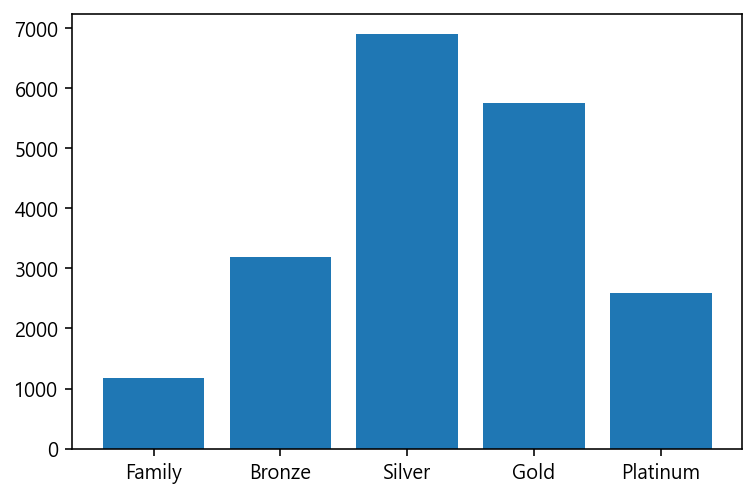

In [138]:
# 등급별 판매 금액 시각화
plt.bar(tmp['등급'],tmp['합계금액'])
# plt.plot(tmp['등급'], tmp['수량']) ##
plt.show()

In [ ]:
# 수량 그래프 추가

# 4.전처리 #2

**1) 열 제거**

- Addr1, RegisterYear, RegisterMonth, Age 열을 제거합니다.

In [140]:
cst.head()

,CustomerID,Gender,Addr1,Qty,Amt,RegisterYear,RegisterMonth,Age,Age2,Level
0,c017487,F,경기도,127.0,296447.0,2002,7,49,40,Silver
1,c017503,F,서울특별시,42.0,160444.0,2002,7,46,40,Silver
2,c017517,M,경기도,192.0,317590.0,2002,7,50,50,Gold
3,c017522,F,강원도,64.0,219849.0,2002,7,52,50,Silver
4,c017526,F,경기도,26.0,48881.0,2002,7,57,50,Bronze


In [142]:
# 열 제거
cst.drop(['Addr1','RegisterYear','RegisterMonth','Age'],axis=1, inplace=True)
cst.head()


,CustomerID,Gender,Qty,Amt,Age2,Level
0,c017487,F,127.0,296447.0,40,Silver
1,c017503,F,42.0,160444.0,40,Silver
2,c017517,M,192.0,317590.0,50,Gold
3,c017522,F,64.0,219849.0,50,Silver
4,c017526,F,26.0,48881.0,50,Bronze


**2) 열 이름 변경**

- Age2 열 이름을 Age로 변경합니다.

In [147]:
# 열 이름 변경: Age2 --> Age
cst.rename(columns={'Age2':'Age'}, inplace=True)
cst.head()


,CustomerID,Gender,Qty,Amt,Age,Level
0,c017487,F,127.0,296447.0,40,Silver
1,c017503,F,42.0,160444.0,40,Silver
2,c017517,M,192.0,317590.0,50,Gold
3,c017522,F,64.0,219849.0,50,Silver
4,c017526,F,26.0,48881.0,50,Bronze


**3) 가변수화**

- Gender, Age, Level 열을 가변수화 합니다.

In [152]:
# 가변수화
cst = pd.get_dummies(cst, columns=['Gender', 'Age', 'Level'], drop_first=True)
cst.head()

,CustomerID,Qty,Amt,Gender_M,Age_20,Age_30,Age_40,Age_50,Age_60,Age_70,Age_80,Level_Bronze,Level_Silver,Level_Gold,Level_Platinum
0,c017487,127.0,296447.0,0,0,0,1,0,0,0,0,0,1,0,0
1,c017503,42.0,160444.0,0,0,0,1,0,0,0,0,0,1,0,0
2,c017517,192.0,317590.0,1,0,0,0,1,0,0,0,0,0,1,0
3,c017522,64.0,219849.0,0,0,0,0,1,0,0,0,0,1,0,0
4,c017526,26.0,48881.0,0,0,0,0,1,0,0,0,1,0,0,0
